## For the following code, we will discuss the statistical properties that we use in our paper. It will include Figures 1-4.

#### The code below is for Figure 1, where we show the statistics for the SDSS Dataset. We generate images to depict various statistical properties such as Query Type, Character Count, Word Count, Table Count, Join Count, Column Count, Function Count, Predicate Count, Nestedness Level, and Aggregation. Due to page limitations, however, in the paper, we only use data related to Query Type, Word Count, Table Count, Predicate Count, and Nestedness Level.

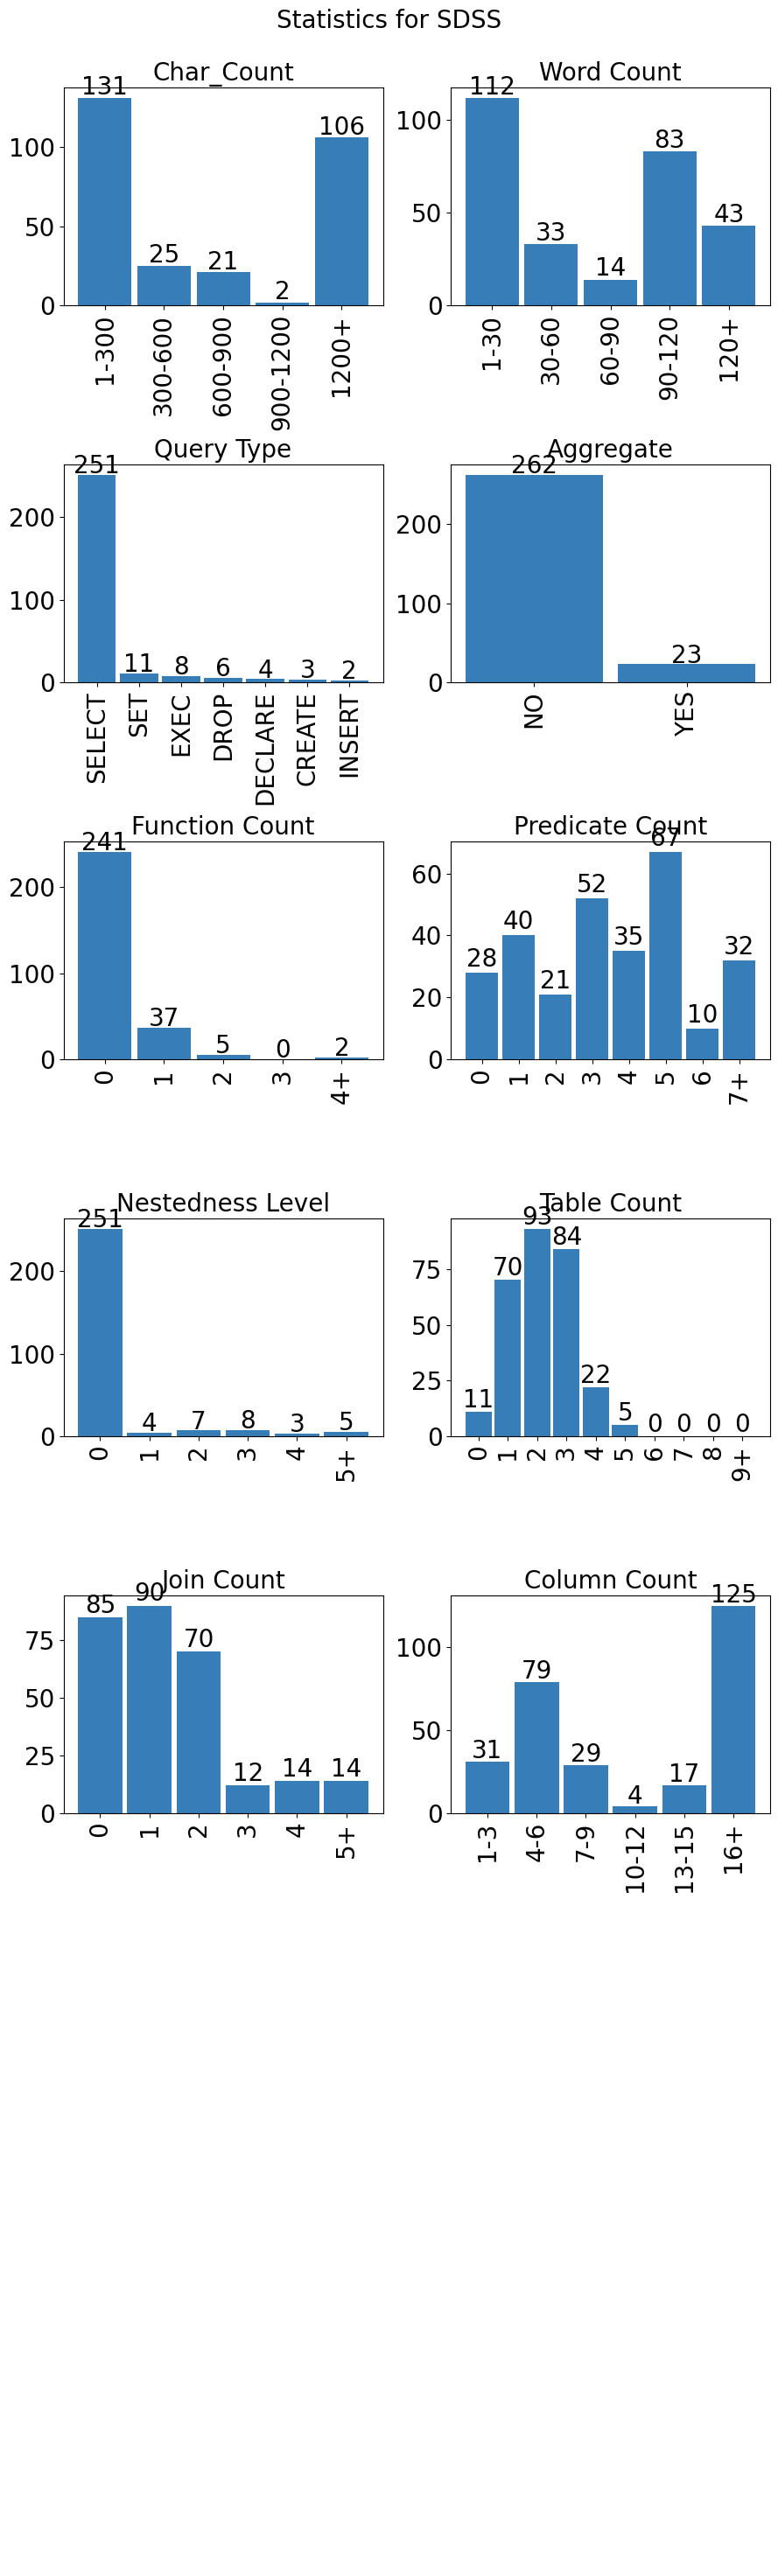

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert 'Function_Count', 'Predicate_Count', and 'Nestedness_Level' to integer to ensure proper binning and comparisons
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
        labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3,4,5,6]  # Corrected bin edges
        nestedness_labels = ["0", "1", "2","3","4","5+"]  # Corrected labels
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)
        
    if 'Table_Count' in data.columns:
        data['Table_Count'] = data['Table_Count'].astype(int)
        table_bins = [0, 1, 2, 3, 4, 5, 6,7,8,9, float('inf')]
        table_labels = ["0", "1", "2", "3", "4", "5", "6","7","8","9+"]
        data['Table_Count_Range'] = pd.cut(data['Table_Count'], bins=table_bins, labels=table_labels, right=False)
    
    if 'Join_Count' in data.columns:
        data['Join_Count'] = data['Join_Count'].astype(int)
        join_bins = [0, 1, 2, 3, 4, 5, float('inf')]
        join_labels = ["0", "1", "2", "3", "4", "5+"]
        data['Join_Count_Range'] = pd.cut(data['Join_Count'], bins=join_bins, labels=join_labels, right=False)
        
    if 'Column_Count' in data.columns:
        data['Column_Count'] = data['Column_Count'].astype(int)
        bins_column_count = [0, 3, 6, 9, 12, 15, float('inf')]  # Defines edges of the bins
        labels_column_count = ["1-3", "4-6", "7-9", "10-12", "13-15", "16+"]
        data['Column_Count_Range'] = pd.cut(data['Column_Count'], bins=bins_column_count, labels=labels_column_count, right=False)

    

    # Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Char_Count'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Char_Count'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Char_Count', f'{workload_name}_Char_Count'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level'),
        (data['Table_Count_Range'].value_counts().sort_index(), 'Table Count', f'{workload_name}_table_count'),
        (data['Join_Count_Range'].value_counts().sort_index(), 'Join Count', f'{workload_name}_join_count'),
        (data['Column_Count_Range'].value_counts().sort_index(), 'Column Count', f'{workload_name}_column_count')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)
        ax.set_title(xlabel, fontsize=fsize)  # Add title to each subplot

        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    #'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    #'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv",
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


#### The code below is for Figure 2, where we show the statistics for the SQLShare Dataset. We generate images to depict various statistical properties such as Query Type, Character Count, Word Count, Table Count, Join Count, Column Count, Function Count, Predicate Count, Nestedness Level, and Aggregation. Due to page limitations, however, in the paper, we only use data related to Query Type, Word Count, Table Count, Predicate Count, and Nestedness Level.

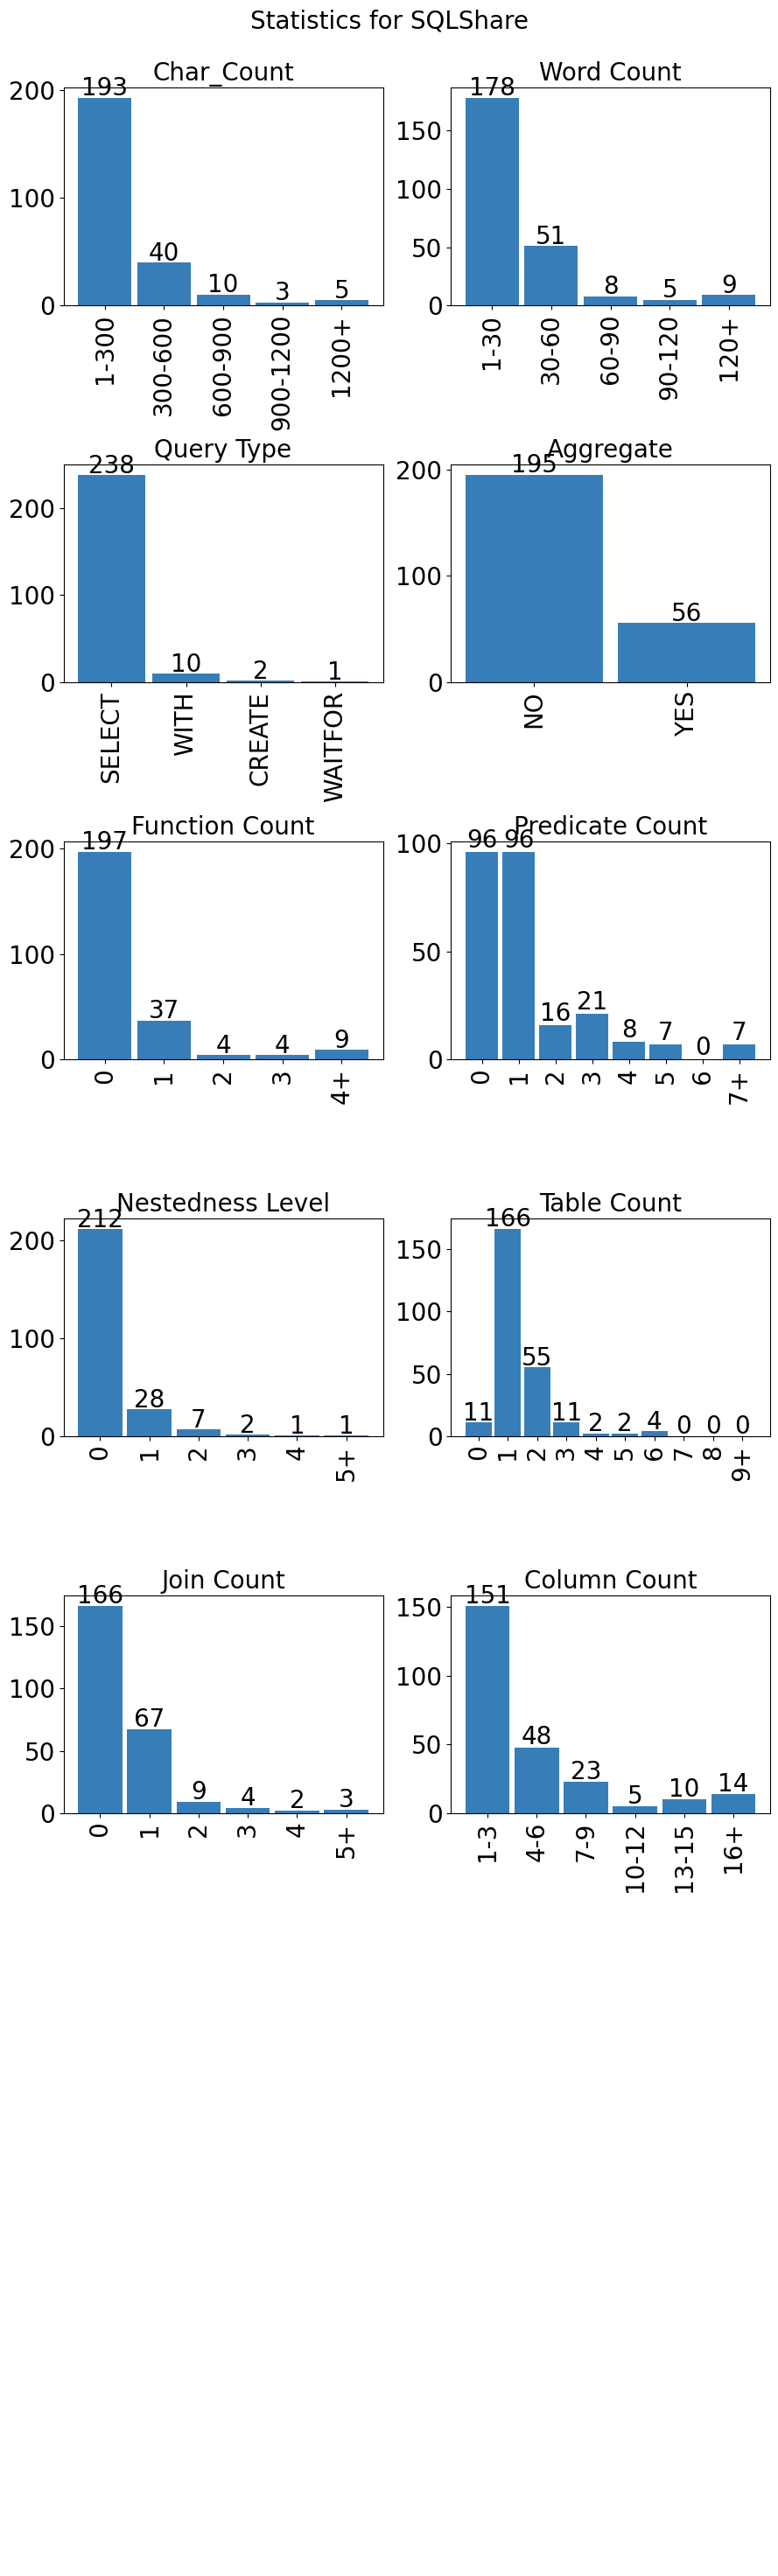

In [19]:

import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert 'Function_Count', 'Predicate_Count', and 'Nestedness_Level' to integer to ensure proper binning and comparisons
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
        labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3,4,5,6]  # Corrected bin edges
        nestedness_labels = ["0", "1", "2","3","4","5+"]  # Corrected labels
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)
        
    if 'Table_Count' in data.columns:
        data['Table_Count'] = data['Table_Count'].astype(int)
        table_bins = [0, 1, 2, 3, 4, 5, 6,7,8,9, float('inf')]
        table_labels = ["0", "1", "2", "3", "4", "5", "6","7","8","9+"]
        data['Table_Count_Range'] = pd.cut(data['Table_Count'], bins=table_bins, labels=table_labels, right=False)
    
    if 'Join_Count' in data.columns:
        data['Join_Count'] = data['Join_Count'].astype(int)
        join_bins = [0, 1, 2, 3, 4, 5, float('inf')]
        join_labels = ["0", "1", "2", "3", "4", "5+"]
        data['Join_Count_Range'] = pd.cut(data['Join_Count'], bins=join_bins, labels=join_labels, right=False)
        
    if 'Column_Count' in data.columns:
        data['Column_Count'] = data['Column_Count'].astype(int)
        bins_column_count = [0, 3, 6, 9, 12, 15, float('inf')]  # Defines edges of the bins
        labels_column_count = ["1-3", "4-6", "7-9", "10-12", "13-15", "16+"]
        data['Column_Count_Range'] = pd.cut(data['Column_Count'], bins=bins_column_count, labels=labels_column_count, right=False)

    

    # Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Char_Count'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Char_Count'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Char_Count', f'{workload_name}_Char_Count'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level'),
        (data['Table_Count_Range'].value_counts().sort_index(), 'Table Count', f'{workload_name}_table_count'),
        (data['Join_Count_Range'].value_counts().sort_index(), 'Join Count', f'{workload_name}_join_count'),
        (data['Column_Count_Range'].value_counts().sort_index(), 'Column Count', f'{workload_name}_column_count')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)
        ax.set_title(xlabel, fontsize=fsize)  # Add title to each subplot

        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    #'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    #'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv",
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


#### The code below is for Figure 3, where we present the statistics for the Join-Order Dataset. We generate images to depict various statistical properties such as Query Type, Character Count, Word Count, Table Count, Join Count, Column Count, Function Count, Predicate Count, Nestedness Level, and Aggregation. Due to page limitations, however, the paper only includes data on Word Count, Table Count, Predicate Count, and Function Count.

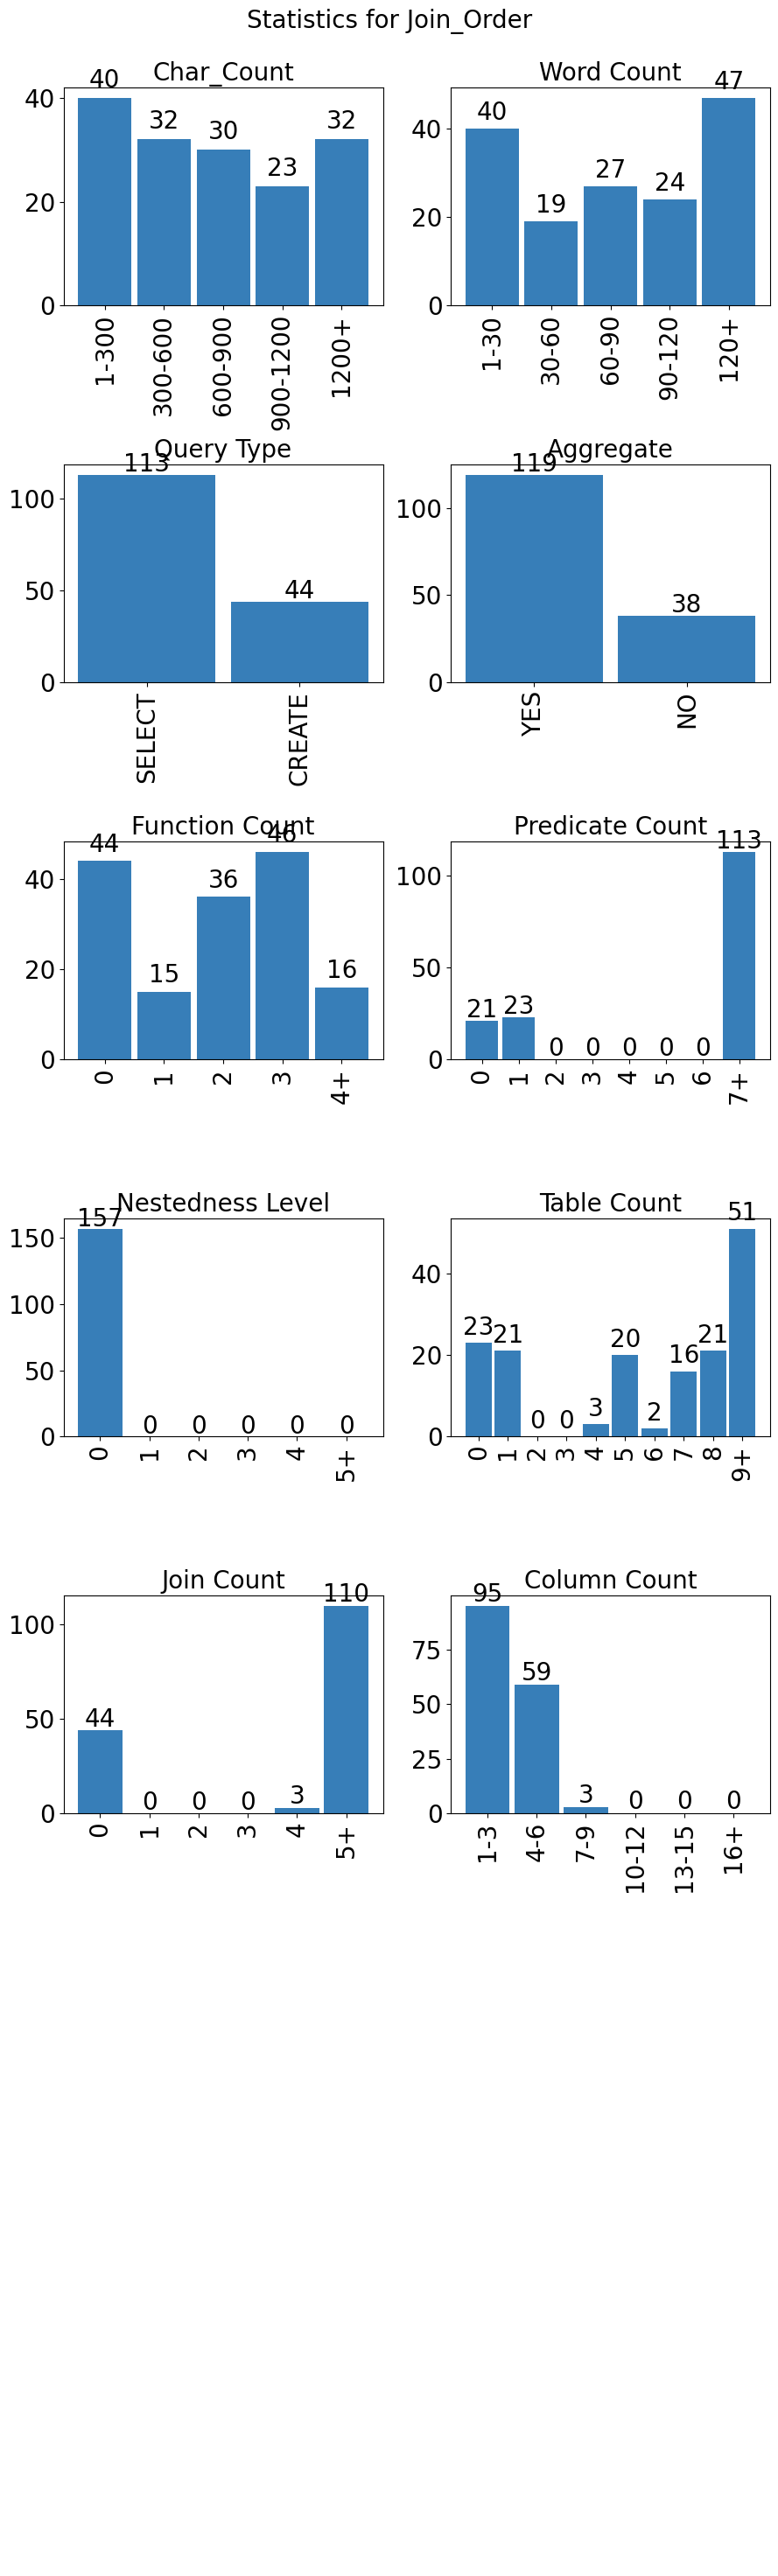

In [18]:

import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert 'Function_Count', 'Predicate_Count', and 'Nestedness_Level' to integer to ensure proper binning and comparisons
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
        labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3,4,5,6]  # Corrected bin edges
        nestedness_labels = ["0", "1", "2","3","4","5+"]  # Corrected labels
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)
    
    
    
    if 'Table_Count' in data.columns:
        data['Table_Count'] = data['Table_Count'].astype(int)
        table_bins = [0, 1, 2, 3, 4, 5, 6,7,8,9, float('inf')]
        table_labels = ["0", "1", "2", "3", "4", "5", "6","7","8","9+"]
        data['Table_Count_Range'] = pd.cut(data['Table_Count'], bins=table_bins, labels=table_labels, right=False)
    
    if 'Join_Count' in data.columns:
        data['Join_Count'] = data['Join_Count'].astype(int)
        join_bins = [0, 1, 2, 3, 4, 5, float('inf')]
        join_labels = ["0", "1", "2", "3", "4", "5+"]
        data['Join_Count_Range'] = pd.cut(data['Join_Count'], bins=join_bins, labels=join_labels, right=False)
        
    if 'Column_Count' in data.columns:
        data['Column_Count'] = data['Column_Count'].astype(int)
        bins_column_count = [0, 3, 6, 9, 12, 15, float('inf')]  # Defines edges of the bins
        labels_column_count = ["1-3", "4-6", "7-9", "10-12", "13-15", "16+"]
        data['Column_Count_Range'] = pd.cut(data['Column_Count'], bins=bins_column_count, labels=labels_column_count, right=False)

    
    # Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Char_Count'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Char_Count'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Char_Count', f'{workload_name}_Char_Count'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level'),
        (data['Table_Count_Range'].value_counts().sort_index(), 'Table Count', f'{workload_name}_table_count'),
        (data['Join_Count_Range'].value_counts().sort_index(), 'Join Count', f'{workload_name}_join_count'),
        (data['Column_Count_Range'].value_counts().sort_index(), 'Column Count', f'{workload_name}_column_count')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)
        ax.set_title(xlabel, fontsize=fsize)  # Add title to each subplot
        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    #'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    #'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv",
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


#### The code below is for Figure 4, which presents the heatmaps for three datasets: SDSS, SQLShare, and Join-Order.

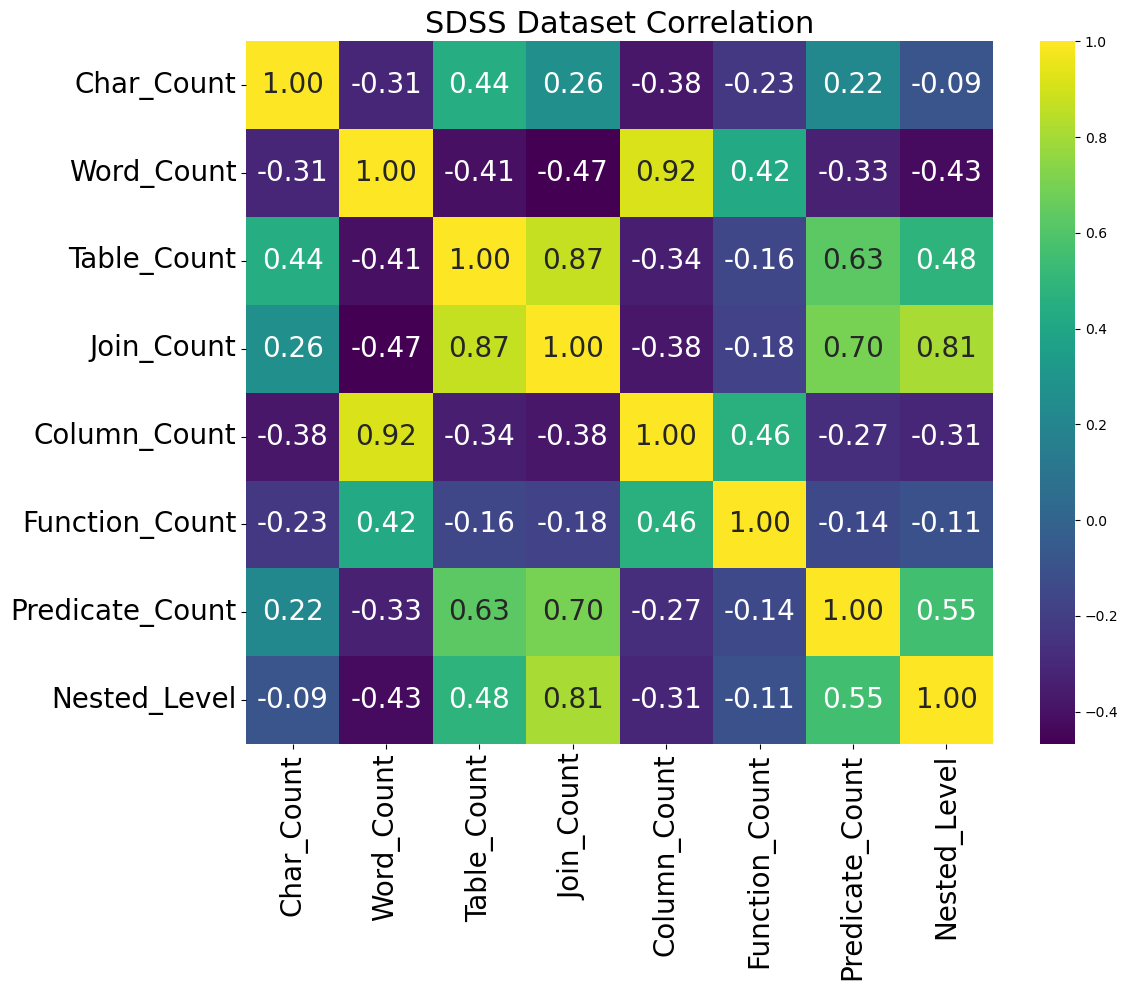

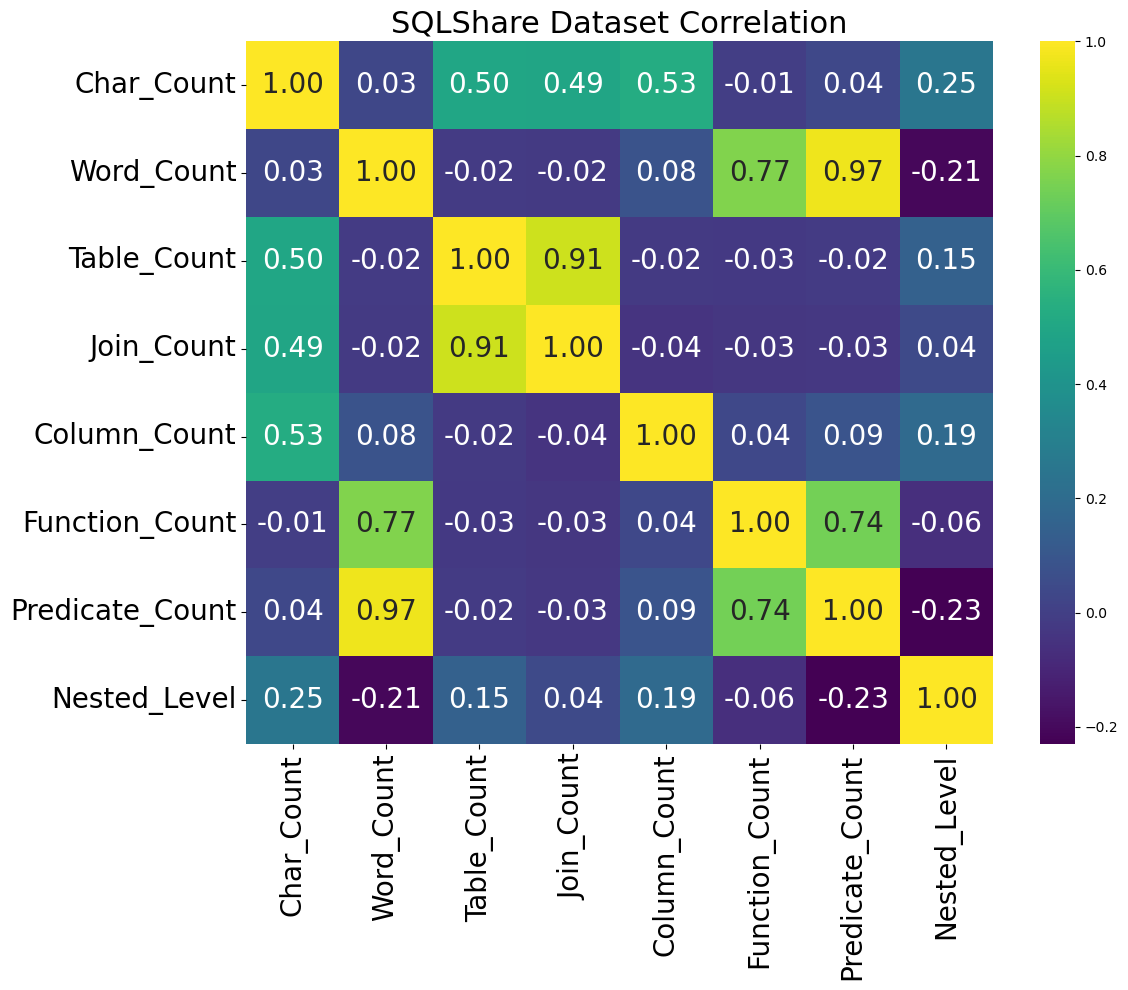

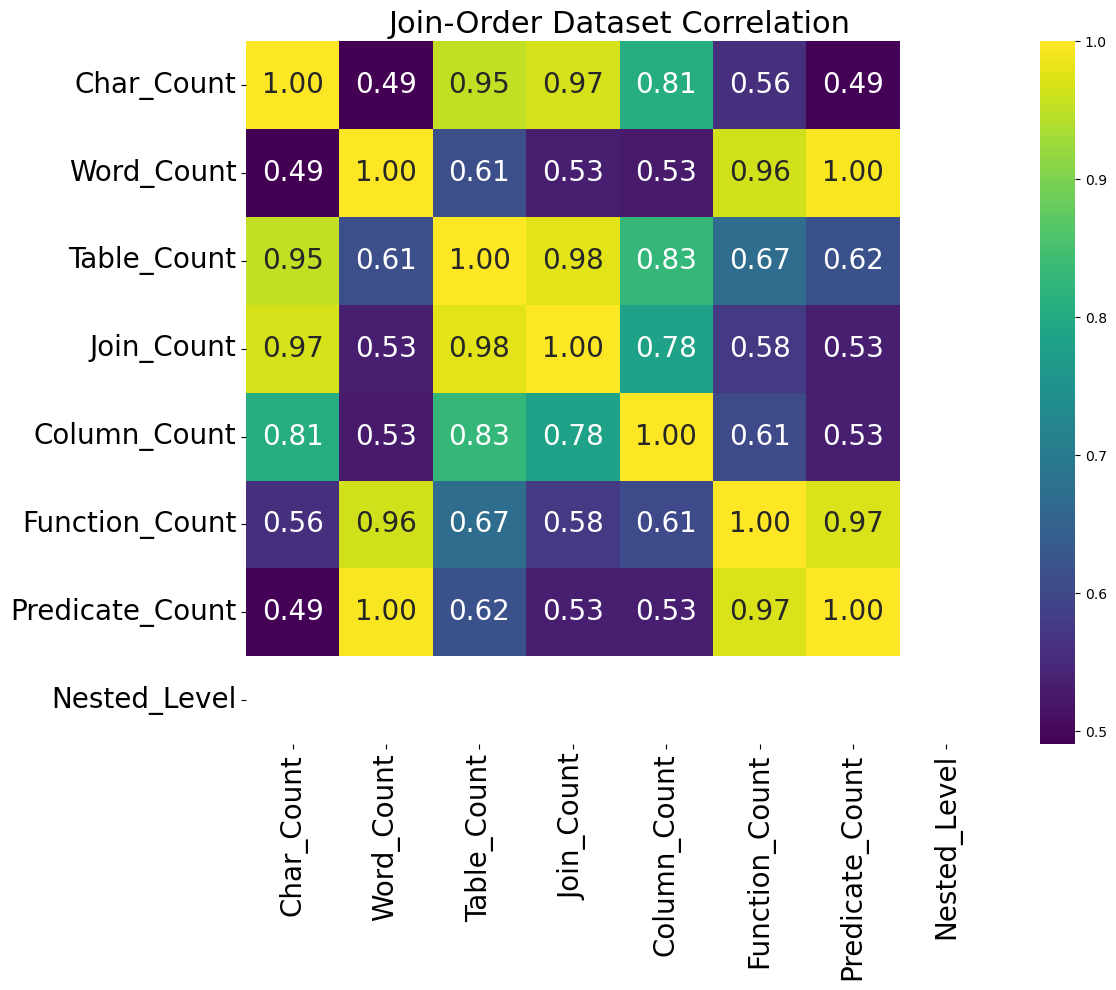

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the uploaded files
sqlshare_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare.csv")
join_order_stats = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join.csv")
sdss_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss.csv")
spider_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider.csv")

# Remove 'Nestedness_Level' if it exists
#for stats in [join_order_stats, sdss_stat, spider_stat]:
 #   if 'Nestedness_Level' in stats.columns:
  #      stats.drop(columns=['Nestedness_Level'], inplace=True)

# Calculate the correlation matrices
correlation_sqlshare = sqlshare_stat.corr(numeric_only=True)
correlation_join_order = join_order_stats.corr(numeric_only=True)
correlation_sdss = sdss_stat.corr(numeric_only=True)
correlation_spider = spider_stat.corr(numeric_only=True)

# Define a color-blind friendly color palette
color_blind_palette = "viridis"

# Define a function to plot and save heatmap
def plot_and_save_heatmap(correlation, dataset_name, filename):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation, annot=True, cmap=color_blind_palette, fmt=".2f", annot_kws={'size': 20})
    plt.xticks(fontsize=20)  # Ensure font sizes are consistent with previous plots
    plt.yticks(fontsize=20)  # Ensure font sizes are consistent with previous plots
    #plt.title(f'{dataset_name} Dataset Correlation', fontsize=22)  # Set title to indicate the dataset
    plt.xlabel('')  # Remove x-label as you requested no labels
    plt.ylabel('')
    plt.title(f'{dataset_name} Dataset Correlation', fontsize=22)
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')  # Save the figure correctly formatted
    plt.show()
    plt.close()

# Call the function for each dataset
plot_and_save_heatmap(correlation_sdss, 'SDSS', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SDSS_Correlation.pdf")
plot_and_save_heatmap(correlation_sqlshare, 'SQLShare', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SQLShare_Correlation.pdf")
plot_and_save_heatmap(correlation_join_order, 'Join-Order', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Join_Order_Correlation.pdf")

#plot_and_save_heatmap(correlation_spider, 'Spider', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Spider_Correlation.pdf")
